# ARIMA MODELS

### An autoregressive integrated moving average, or ARIMA, is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends. A statistical model is autoregressive if it predicts future values based on past values. (Investopedia)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

import warnings
warnings.filterwarnings("ignore")

# yahoo_finance is used to fetch data
import yfinance as yf
yf.pdr_override()

In [3]:
# input
symbol = 'BGN.MI'
start = '2014-01-01'
end = '2023-06-24'

# Read data
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,22.760000,22.790001,22.57,22.760000,13.372984,143919
2014-01-03,22.760000,22.879999,22.57,22.740000,13.361230,112908
2014-01-06,22.690001,22.980000,20.49,21.500000,12.632648,103106
2014-01-07,21.940001,22.700001,21.83,22.379999,13.149705,243926
2014-01-08,22.320000,22.420000,21.82,21.950001,12.897055,320030


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2410 entries, 2014-01-02 to 2023-06-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2410 non-null   float64
 1   High       2410 non-null   float64
 2   Low        2410 non-null   float64
 3   Close      2410 non-null   float64
 4   Adj Close  2410 non-null   float64
 5   Volume     2410 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 131.8 KB


In [5]:
df['Adj Close'].describe()

count    2410.000000
mean       20.346612
std         6.173230
min        10.721983
25%        15.584162
50%        19.056444
75%        24.180422
max        36.185944
Name: Adj Close, dtype: float64

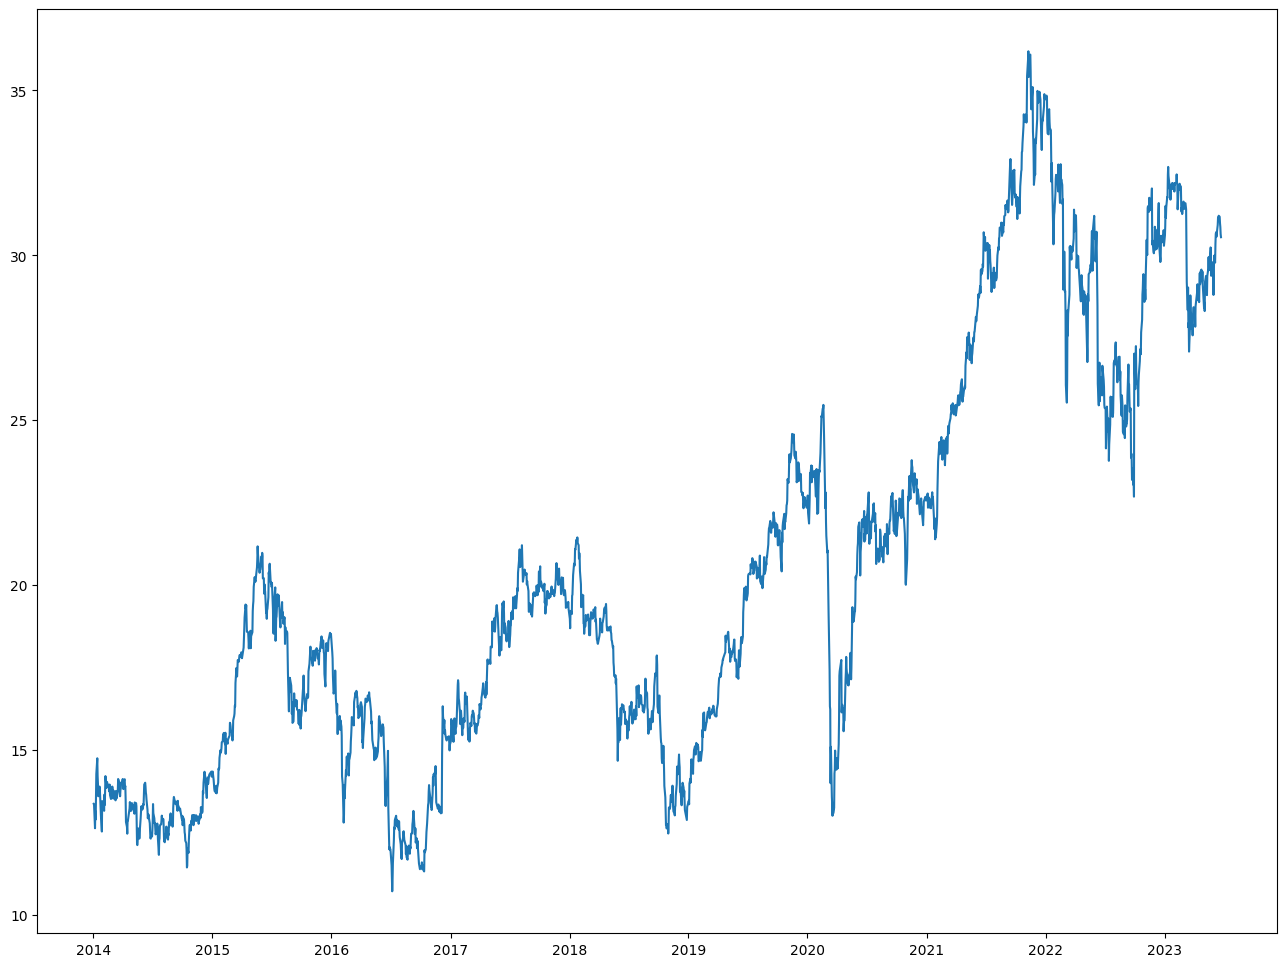

In [6]:
plt.figure(1, figsize=(16,12))
_= plt.plot(df['Adj Close'])

In [7]:
df = df[['Adj Close']].copy()

In [8]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Adj Close'].dropna())
print("ADF Statistic: %s " % result[0])
print("p-value: %s " % result[1])

ADF Statistic: -1.408284873811613 
p-value: 0.5782978640712707 


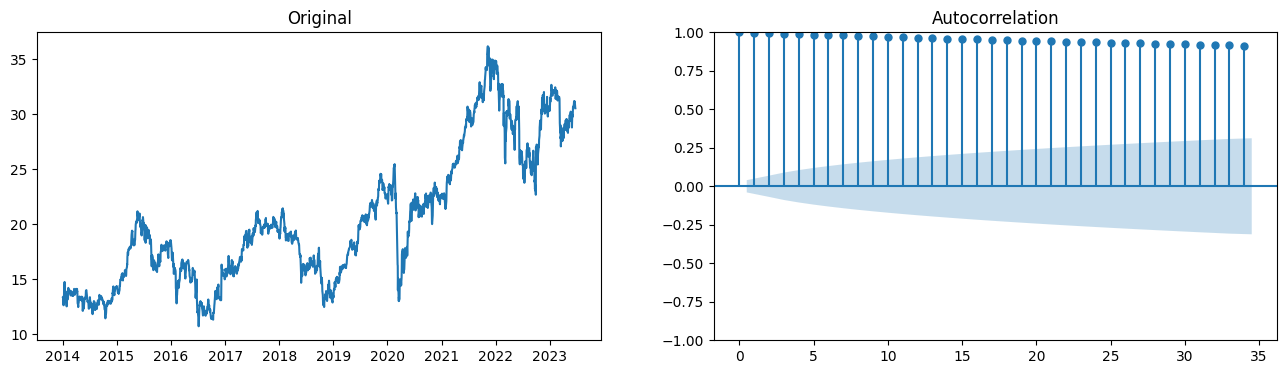

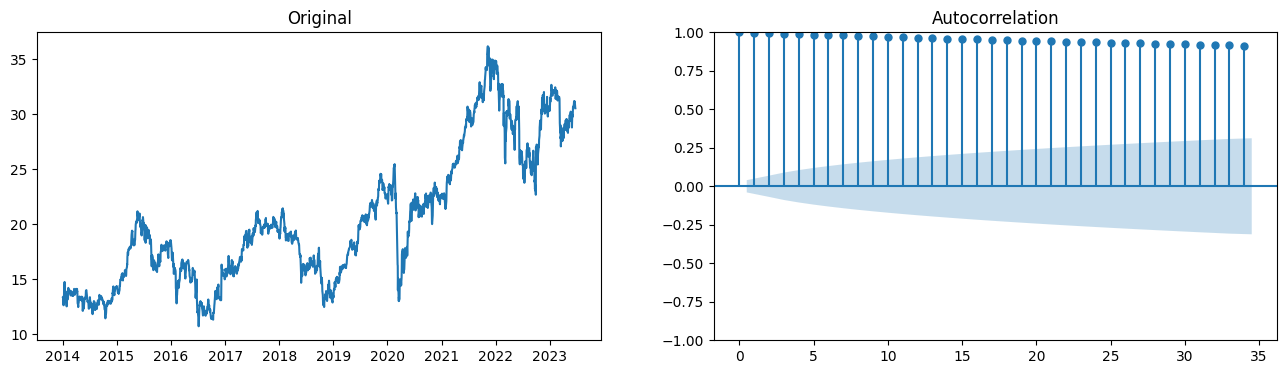

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1, ax2) = plt.subplots(1 , 2, figsize=(16,4))

ax1.plot(df['Adj Close'])
ax1.set_title('Original')
plot_acf(df['Adj Close'], ax=ax2)

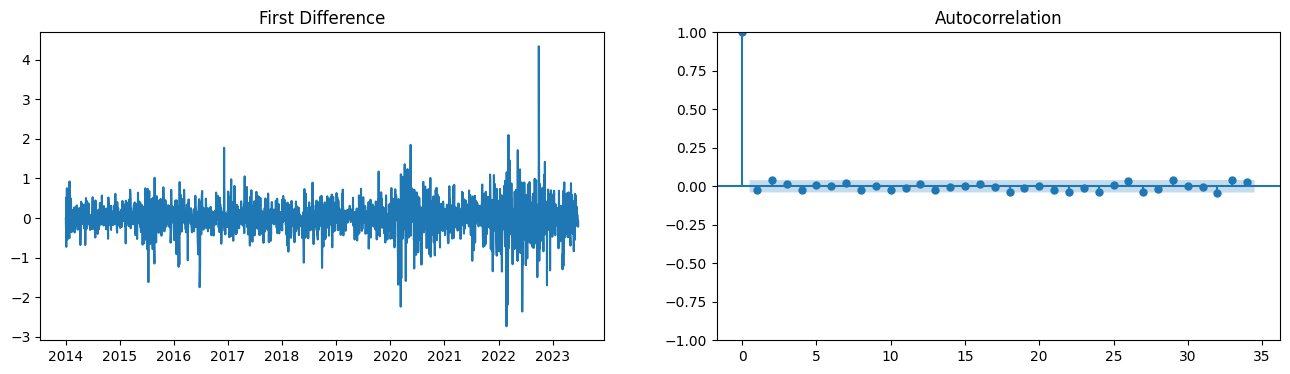

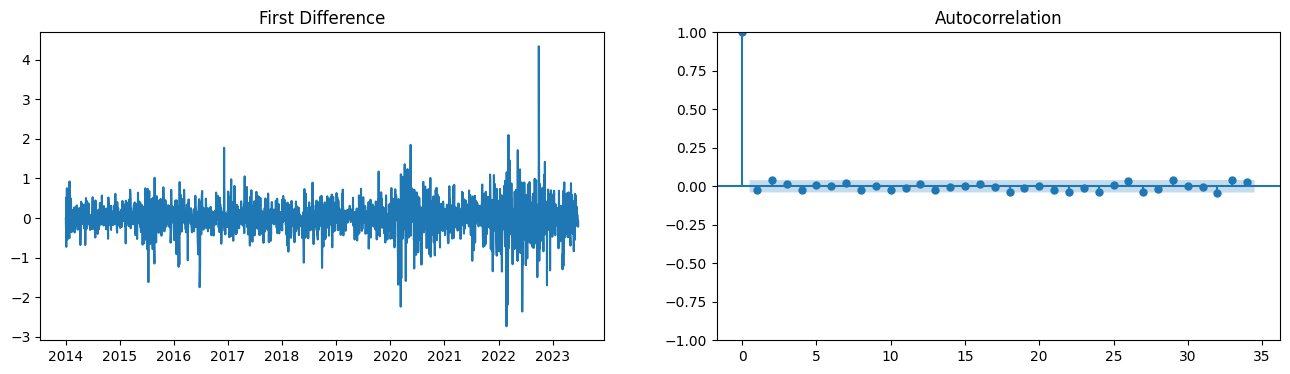

In [10]:
diff = df['Adj Close'].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1 , 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title('First Difference')
plot_acf(diff, ax=ax2)

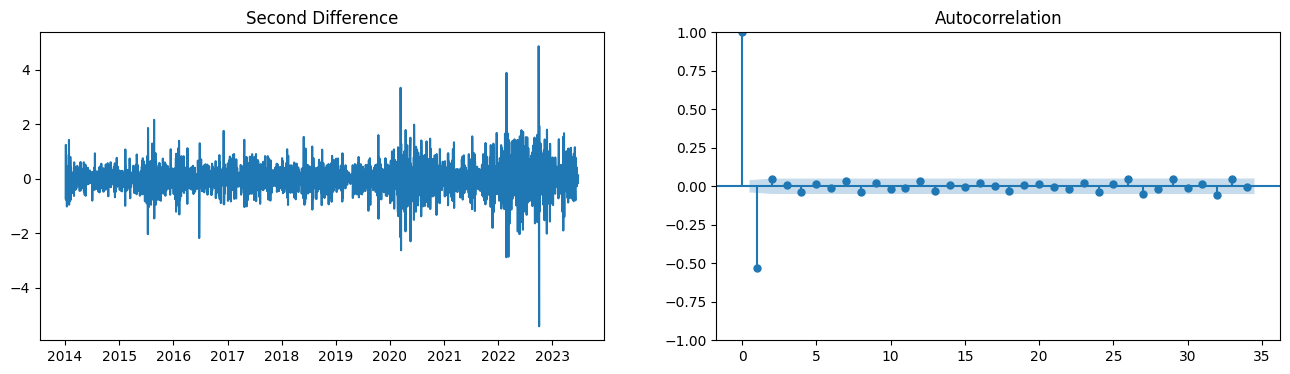

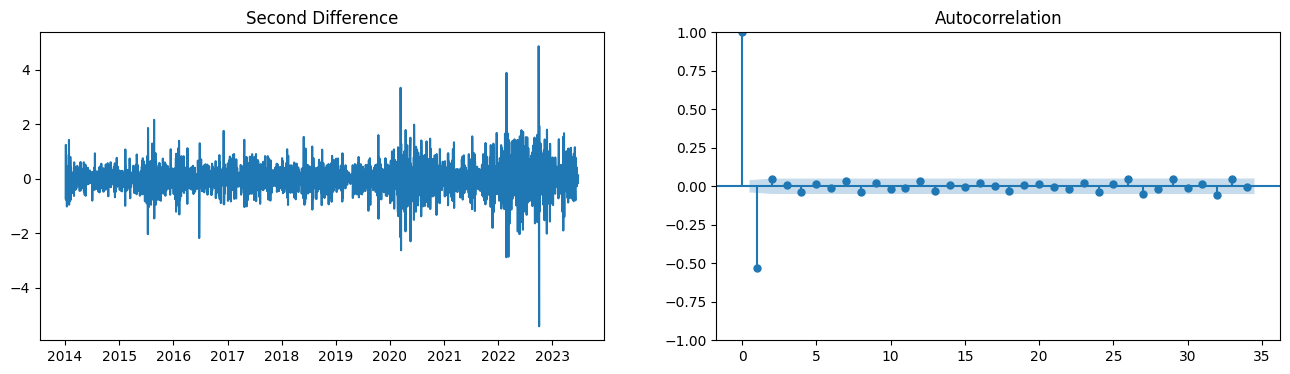

In [11]:
diff = df['Adj Close'].diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1 , 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Second Difference')
plot_acf(diff, ax=ax2)

In [12]:
!pip install pmdarima
from pmdarima.arima.utils import ndiffs

ndiffs(df['Adj Close'], test='adf')

ModuleNotFoundError: ignored

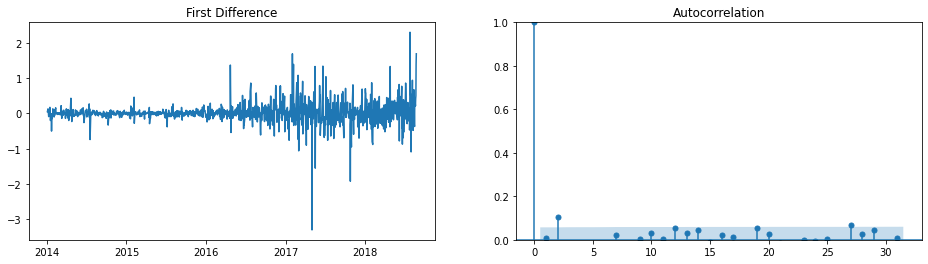

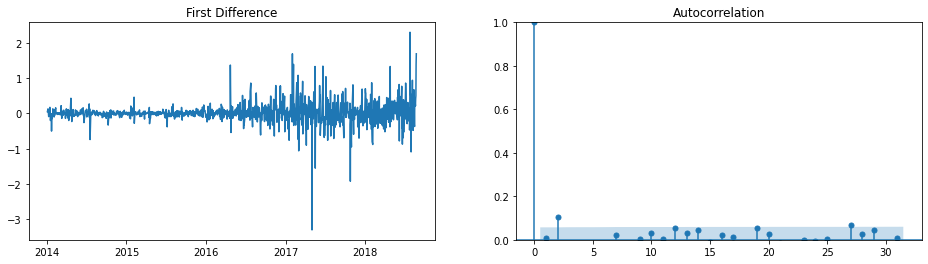

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

diff = df['Adj Close'].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1 , 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title('First Difference')
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df['Adj Close'], order=(6, 1, 3)  )
result = model.fit(disp=0)

C:\Users\Tin Hang\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Tin Hang\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 1170
Model:                 ARIMA(6, 1, 3)   Log Likelihood                -237.876
Method:                       css-mle   S.D. of innovations              0.297
Date:                Thu, 10 Jun 2021   AIC                            497.753
Time:                        18:35:32   BIC                            553.465
Sample:                             1   HQIC                           518.765
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0168      0.008      2.078      0.038       0.001       0.033
ar.L1.D.Adj Close    -0.3968      0.237     -1.676      0.094      -0.861       0.067
ar.L2.D.Adj Close    -0.

(array([0.00154278, 0.        , 0.00154278, 0.00308556, 0.05245458,
        1.33604913, 0.36563931, 0.03085564, 0.01234226, 0.00154278]),
 array([-3.23744493, -2.68344514, -2.12944535, -1.57544555, -1.02144576,
        -0.46744597,  0.08655382,  0.64055362,  1.19455341,  1.7485532 ,
         2.30255299]),
 <BarContainer object of 10 artists>)

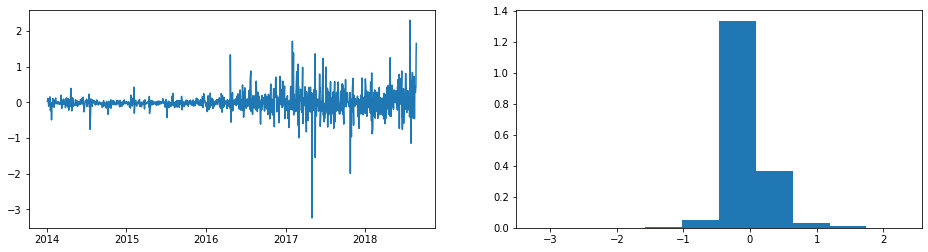

In [ ]:
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1 , 2, figsize=(16,4))

ax1.plot(residuals)
ax2.hist(residuals, density=True)

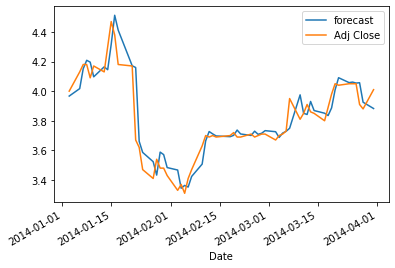

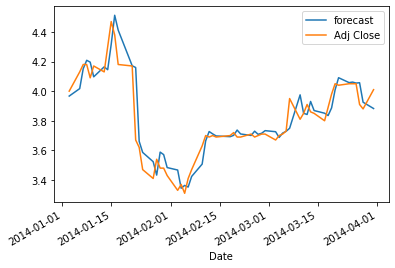

In [ ]:
result.plot_predict(start=1, end=60, dynamic=False)